In [16]:
using Revise
using Images, TestImages
using FFTW
using SeisPlot

# Developing package (should change to QSEIS after translation)
using HCDSP

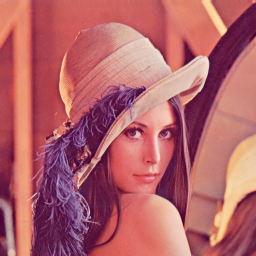

In [18]:
img = testimage("lena")

In [19]:
# split in channels
ch = float64.(channelview(img));

# create a quaternion
Q = quaternion(ch[1,:,:,],ch[2,:,:],ch[3,:,:,]);

# Define eigenaxis for transformation
ax = normalize(quaternion(1.0,1.0,1.0))

# Define side for transformation
side = "left";

# qft
Qf = qfft(Q,ax,side);

# iqft
Qi = iqfft(Qf,ax,side);

# If float32, this difference is ≈ 1e-8/9
@show norm(Qi-Q)^2;

norm(Qi - Q) ^ 2 = 1.5107978382502532e-26


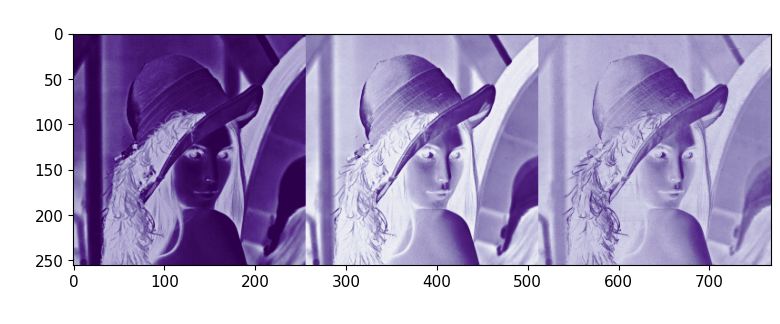

im

In [28]:
SeisPlotTX([ch[1,:,:,] ch[2,:,:] ch[3,:,:,]],hbox=3,wbox=9)

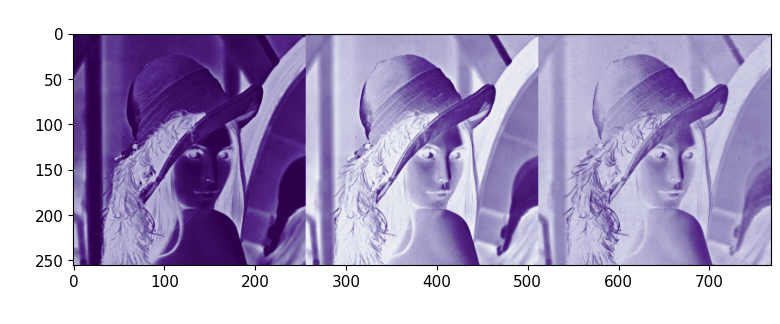

im

In [29]:
SeisPlotTX([imagi.(Qi) imagj.(Qi) imagk.(Qi)],hbox=3,wbox=9)

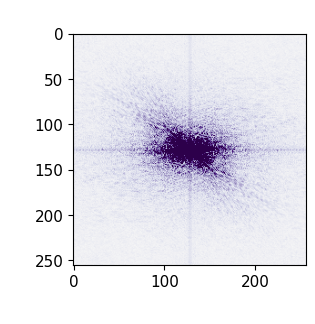

im

In [23]:
SeisPlotTX(fftshift(abs.(Qf)),hbox=3,wbox=3)

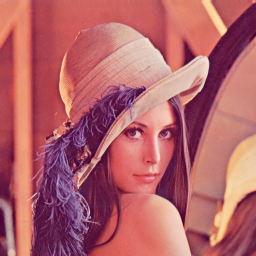

In [21]:
img_q = cat(imagi.(Qi), imagj.(Qi), imagk.(Qi), dims=3)
img_q = permutedims(img_q, (3,1,2));
colorview(RGB, img_q)

In [38]:
# qft                                                                                                                                                                                                                                         
Q1 = qfft(Q,ax,side,1:2);
Q2 = qfft(Q,ax,side);

# iqft                                                                                                                                                                                                                                        
Q1i = iqfft(Q2,ax,side,1:2);
Q2i = iqfft(Q1,ax,side);

@show norm(Q1-Q2)^2
isapprox(Q1,Q2)

@show norm(Q1i-Q2i)^2
isapprox(Q1i,Q2i)

@show norm(Q1i-Q)^2
isapprox(Q1i,Q)

@show norm(Q2i-Q)^2
isapprox(Q2i,Q)

norm(Q1 - Q2) ^ 2 = 0.0
norm(Q1i - Q2i) ^ 2 = 0.0
norm(Q1i - Q) ^ 2 = 1.5107978382502532e-26
norm(Q2i - Q) ^ 2 = 1.5107978382502532e-26


true